# Spectrogram

In [1]:
import numpy as np
import scipy.io as sio
from scipy import signal
from scipy.fft import fft
import matplotlib.pyplot as plt

In [2]:
mat = sio.loadmat('data/sampleEEGdata.mat')
EEG = mat['EEG']
srate = EEG['srate'][0][0][0][0]
data = EEG['data'][0][0]

**Q**: How can I plot signal in time domain using sampling frequency and data?

In [3]:
data.shape

(64, 640, 99)

99 represents the number of trials of the EEG experiment. In this case, we're interested in data from any one of the trials.

In [4]:
data = data[:,:,0]
data.shape

(64, 640)

Now we're left with a signal that has 64 channels and 640 datapoints.

Text(0, 0.5, 'Amplitude')

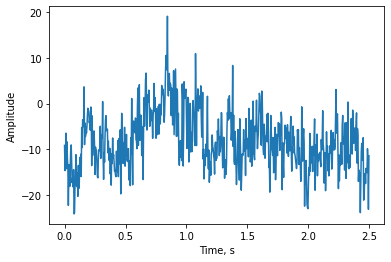

In [5]:
N = data.shape[1]
t = np.arange(0, N) / srate

fig, ax = plt.subplots()
ax.plot(t, data[0,:].T)
ax.set_xlabel('Time, s')
ax.set_ylabel('Amplitude')

**Q:** How can I produce a spectrogram using STFT?

In [6]:
data[0,:].shape

(640,)

In [7]:
f, t, Sxx = signal.spectrogram(data[0,:], fs=srate, window=('hann'), \
                               nperseg=128, noverlap=None, nfft=None, \
                               detrend='constant', return_onesided=True, \
                               scaling='density', axis=-1, mode='psd' \
                              )

In [8]:
print(f.shape)
print(t.shape)
print(Sxx.shape)

(65,)
(5,)
(65, 5)


Text(0, 0.5, 'Frequency, Hz')

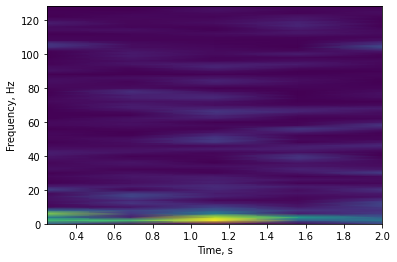

In [9]:
fig, ax = plt.subplots()
ax.pcolormesh(t, f, Sxx, shading='gouraud') # what is gouraud shading?
ax.set_xlabel('Time, s')
ax.set_ylabel('Frequency, Hz')